In [4]:
import numpy as np
import matplotlib.pyplot as plt
import RingAttractorModel

06:39:59 : 5 min 8.6 sec -> eval end


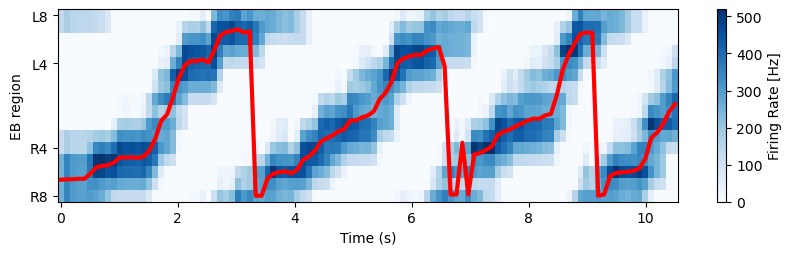

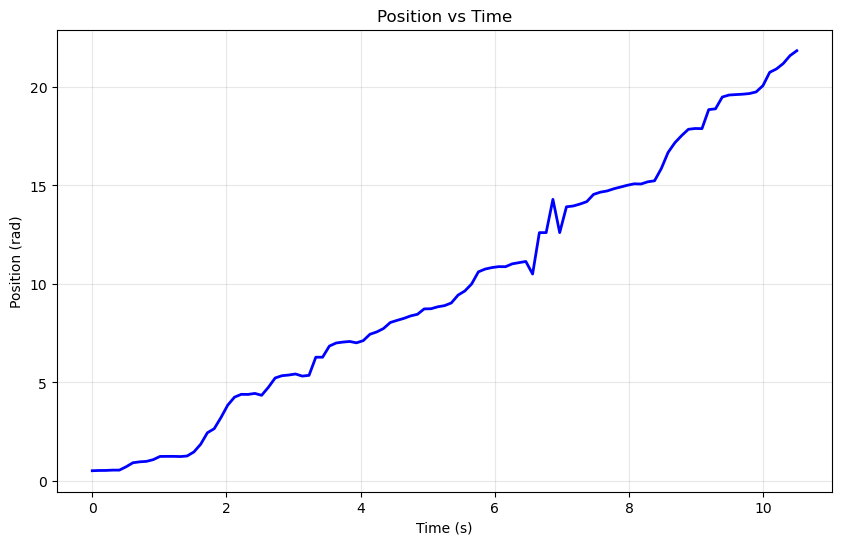

In [2]:
parameters = {'w_EE': 0.719, 'w_EI': 0.143, 'w_IE': 0.74, 'w_II': 0.01, 'w_EP': 0.012, 'w_PE': 0.709, 'w_PP': 0.01}
p = RingAttractorModel.Parameters(**parameters)

r = RingAttractorModel.Simulator(parameters=p)
r.run(t_epg_open=200,
      t_epg_close=300,
      t_pen_open=10000,
      stimulus_strength=0.05,
      stimulus_location=np.deg2rad(0),
      shifter_strength=0.0128,
      half_PEN='right')
r.plot()
r.xt_plot()

In [5]:
_eip_rg = {
    'original': [
        [1, 9, 0, 8],
        [1, 9, 10],
        [2, 10, 1],
        [2, 10, 11],
        [3, 11, 2],
        [3, 11, 12],
        [4, 12, 3],
        [4, 12, 13],
        [5, 13, 4],
        [5, 13, 14],
        [6, 14, 5],
        [6, 14, 15],
        [7, 15, 6],
        [7, 15, 16],
        [8, 16, 7],
        [8, 16, 17, 9]],
    'symmetry': [
        [0, 1, 17],
        [1, 17, 10],
        [1, 2, 10],
        [2, 10, 11],
        [2, 3, 11],
        [3, 11, 12],
        [3, 4, 12],
        [4, 12, 13],
        [4, 5, 13],
        [5, 13, 14],
        [5, 6, 14],
        [6, 14, 15],
        [6, 7, 15],
        [7, 15, 16],
        [7, 0, 16],
        [0, 16, 17]]
}

_WEIGHT_MATRICES = {}
for circuit, groups in _eip_rg.items():
    W = np.zeros((18, len(groups)), dtype=float)
    for j, idx_list in enumerate(groups):
        w = 1.0 / len(idx_list)
        W[idx_list, j] = w
    _WEIGHT_MATRICES[circuit] = W

def eip_to_eb_fast(eip_fr: np.ndarray, circuit: str = 'symmetry') -> np.ndarray:
    eip = np.asarray(eip_fr)
    W = _WEIGHT_MATRICES[circuit]
    eb_fr = eip.dot(W)
    return eb_fr

def plot_original(t, fr, title=None, file_name=None, region='EB', y_label='Time (s)', cmap='Blues', 
            save=False, folder='figures', plot_gau=True, figsize=(10, 2.5), eip2eb=True):
    
    if eip2eb:
        fr_with_zeros = np.zeros((fr.shape[0], fr.shape[1] + 2))
        fr_with_zeros[:, :8] = fr[:, :8]
        fr_with_zeros[:, 10:] = fr[:, 8:]
        eb_fr = eip_to_eb_fast(fr_with_zeros)
        eb_fr = eb_fr.T
    else:
        eb_fr = fr
        
    plt.figure(figsize=figsize)
    plt.pcolormesh(t, [i for i in range(eb_fr.shape[0])], eb_fr, cmap=cmap, shading='nearest')
    plt.colorbar(label='Firing Rate [Hz]')    
    plt.title(title)
    plt.xlabel(y_label)
    plt.ylabel('EB region' if region == 'EB' else 'Neuron ID')
    plt.yticks([0, 4, 11, 15], ['R8', 'R4', 'L4', 'L8'] if region == 'EB' else [0, 5, 10, 15])

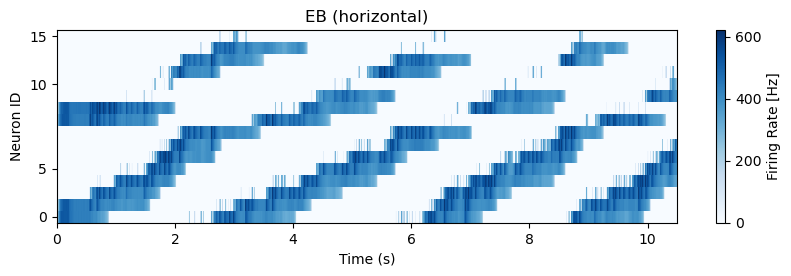

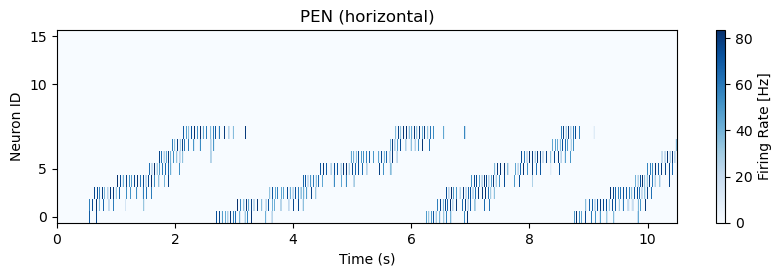

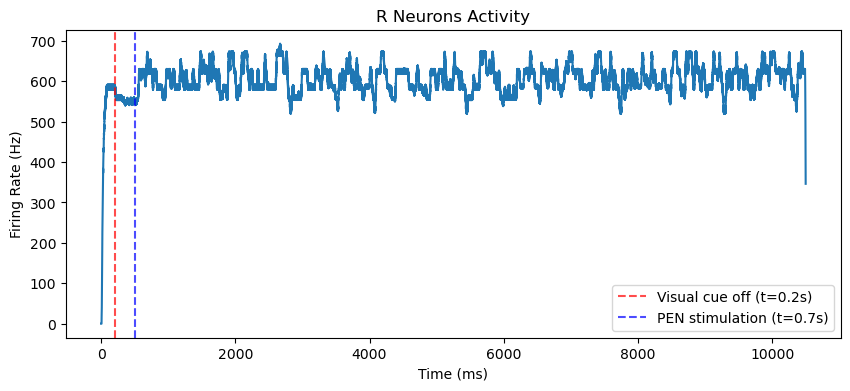

In [9]:
plot_original(r.time, r.fr, eip2eb = False, region=None, title='EB (horizontal)')
plot_original(r.time, r.fr_pen, eip2eb = False, region=None, title='PEN (horizontal)')

plt.figure(figsize=(10, 4))
plt.plot(r.time*1000, r.fr_r.T)
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate (Hz)')
plt.title('R Neurons Activity')
plt.axvline(x=200, color='red', linestyle='--', alpha=0.7, label='Visual cue off (t=0.2s)')
plt.axvline(x=500, color='blue', linestyle='--', alpha=0.7, label='PEN stimulation (t=0.7s)')
plt.legend()
